1. Load Data.
2. Define Keras Model.
3. Compile Keras Model.
4. Fit Keras Model.
5. Evaluate Keras Model.
6. Tie It All Together.
7. Make Predictions

#Loading the data

In [389]:
#imports
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
data=pd.read_csv('bank.csv')

In [391]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#EDA

In [392]:
data.shape

(11162, 17)

In [393]:
data.dtypes.value_counts()

object    10
int64      7
dtype: int64

In [394]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [395]:
#categorical data
cat=data.dtypes[data.dtypes=='object'].index
for col in cat:
  print(f'{col :-<12}{data[col].unique()}')

job---------['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital-----['married' 'single' 'divorced']
education---['secondary' 'tertiary' 'primary' 'unknown']
default-----['no' 'yes']
housing-----['yes' 'no']
loan--------['no' 'yes']
contact-----['unknown' 'cellular' 'telephone']
month-------['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome----['unknown' 'other' 'failure' 'success']
deposit-----['yes' 'no']


**Columns of the dataset** : 

Target : **deposit** (yes/no) has the client subscribed a term deposit?

Features : 
1. Client related
* age (numeric)
* job (categorical )
* marital (categorical)
* education (categorical)
* default : has the client credit in default? (yes/no)
* balance (numeric)
* housing: has the client a housing loan? (categorical)
* loan: has personal loan? (categorical)
2. Campaign related
* contact :  contact communication type (categorical)
* day : last contact day of the week (numeric)
* month : last contact month of year (categorical)
* duration : last contact duration, in seconds (numeric)
* campaign : number of contacts performed during this campaign and for this client (numeric)
* pdays : number of days since the client was last contacted from a previous campaign (numeric) 
* previous :  number of contacts performed before this campaign and for this client (numeric)
* poutcome : outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")


In [396]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

"Great! No missing values!"
... Well, yes but actually no. In fact missing values are hidden under another form here : the category *'unknown'* in categorical variables. 

Lets reveal them !

In [397]:
def f(x):
    if x == 'unknown':
      return (np.nan)
    else:
      return x
for col in data.select_dtypes('object'):
  data[col]=data[col].transform(f)

In [398]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes


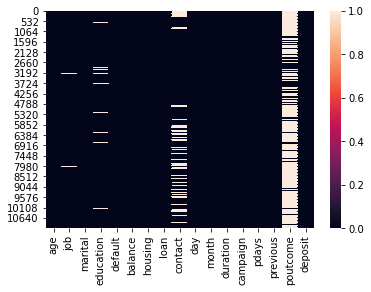

In [399]:
sns.heatmap(data.isna())

In [400]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=False)

poutcome     0.745924
contact      0.210177
education    0.044526
job          0.006271
loan         0.000000
marital      0.000000
default      0.000000
balance      0.000000
housing      0.000000
deposit      0.000000
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
age          0.000000
dtype: float64

We can notice 4 columns that have missing values : here is what we're going to do during the training 

* poutcome: 75% of missing values, we drop the column!
* contact : 21% of missing values, we fill them!
* education : 5% of missing values, we fill them 
* job: 0.6% of missing values, we drop these rows!

Target distribution

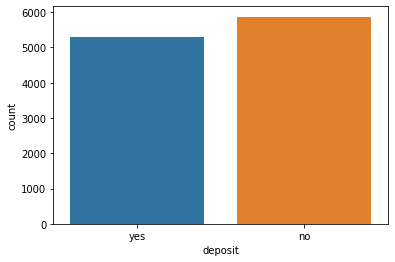

In [401]:
sns.countplot(x='deposit',data=data)

->balanced classes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


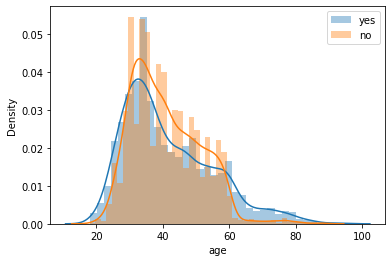

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


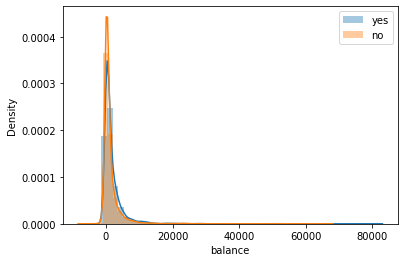

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


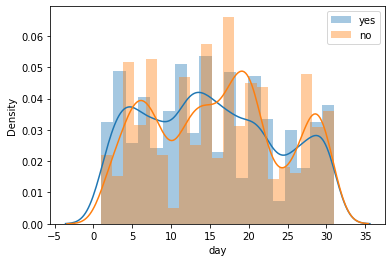

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


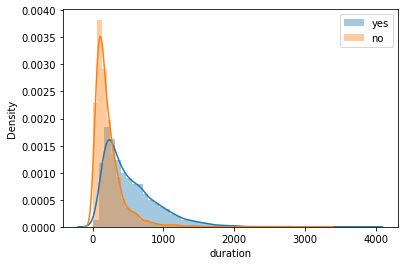

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


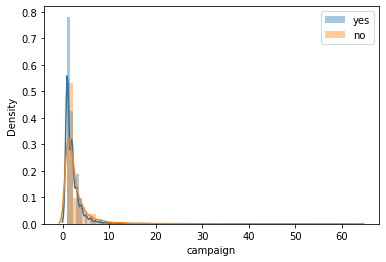

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


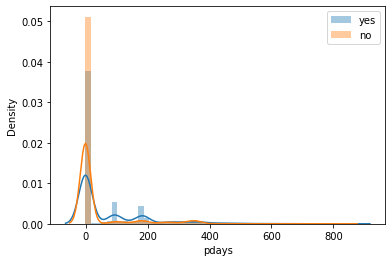

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


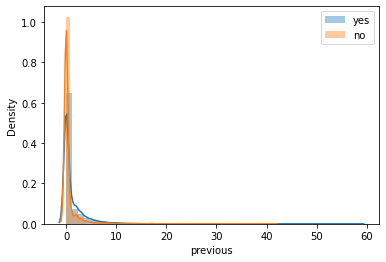

In [402]:
#numeric variables
deposit_yes=data[data.deposit=='yes']
deposit_no=data[data.deposit=='no']
num=data.select_dtypes('int')
for i,col in enumerate(num):
  sns.distplot(deposit_yes[col],label='yes')
  sns.distplot(deposit_no[col],label='no')
  plt.legend()
  plt.show()


The duration of the contact may have an impact on weather the client subscribe or no to a term deposit 

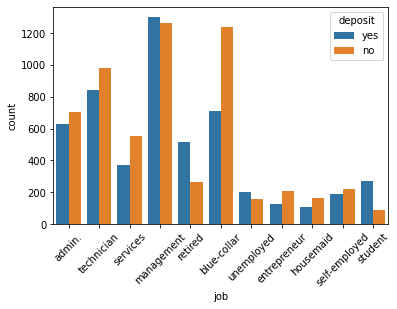

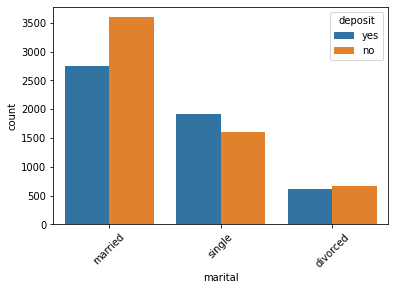

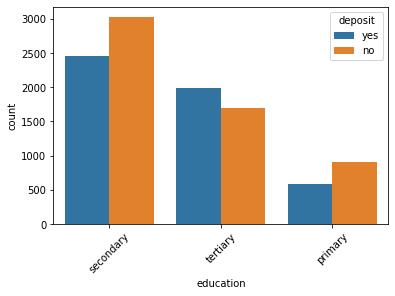

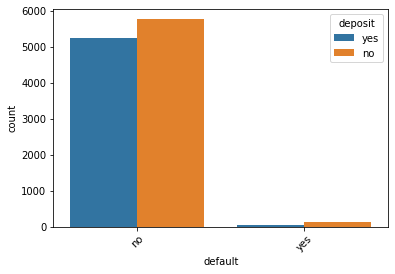

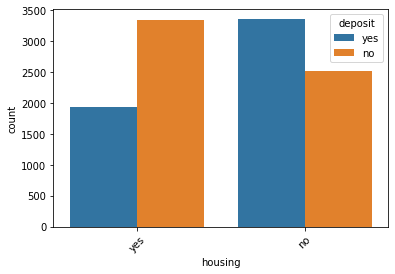

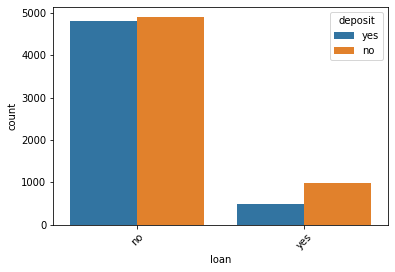

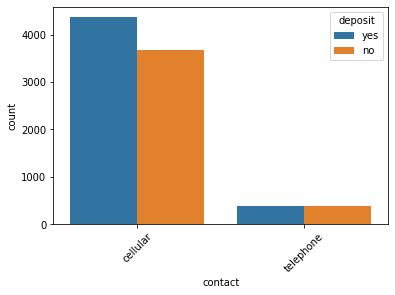

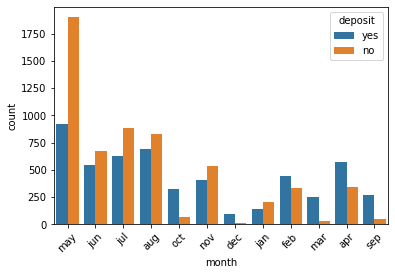

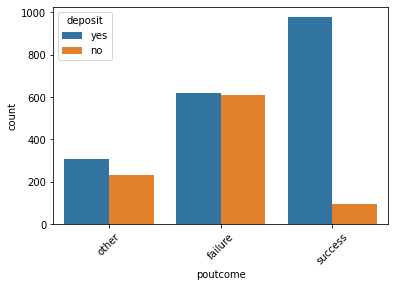

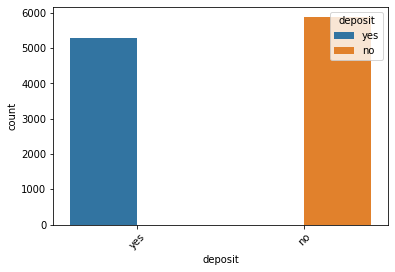

In [403]:
for col in data.select_dtypes('object'):
  plt.figure()
  sns.countplot(x=col,data=data,hue='deposit')
  plt.xticks(rotation=45)

Housing seems to have an impact, poutcome too

#Cleaning

##Missing values

In [404]:
#missing values
data.drop('poutcome',axis=1,inplace=True)

In [405]:
data.dropna(subset=['job'],inplace=True)

In [406]:
data['contact'].mode()

0    cellular
dtype: object

In [407]:
#filling missing values
data['contact'].fillna(data['contact'].mode()[0],inplace=True)
data['education'].fillna(data['education'].mode()[0],inplace=True)

In [408]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

##Categorical variables into numeric

job---------['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital-----['married' 'single' 'divorced']

education---['secondary' 'tertiary' 'primary' 'unknown']

default-----['no' 'yes']

housing-----['yes' 'no']

loan--------['no' 'yes']

contact-----['unknown' 'cellular' 'telephone']

month-------['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


deposit-----['yes' 'no']

In [409]:
for col in ['deposit','default','housing','loan']:
  data[col]=data[col].map({'yes':1,'no':0})


In [410]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,0,2343,1,0,cellular,5,may,1042,1,-1,0,1
1,56,admin.,married,secondary,0,45,0,0,cellular,5,may,1467,1,-1,0,1
2,41,technician,married,secondary,0,1270,1,0,cellular,5,may,1389,1,-1,0,1
3,55,services,married,secondary,0,2476,1,0,cellular,5,may,579,1,-1,0,1
4,54,admin.,married,tertiary,0,184,0,0,cellular,5,may,673,2,-1,0,1


In [411]:
data['month']=data['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [412]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,0,2343,1,0,cellular,5,5,1042,1,-1,0,1
1,56,admin.,married,secondary,0,45,0,0,cellular,5,5,1467,1,-1,0,1
2,41,technician,married,secondary,0,1270,1,0,cellular,5,5,1389,1,-1,0,1
3,55,services,married,secondary,0,2476,1,0,cellular,5,5,579,1,-1,0,1
4,54,admin.,married,tertiary,0,184,0,0,cellular,5,5,673,2,-1,0,1


In [413]:
categorical_cols = ['job', 'marital', 'education', 'contact'] 

df=pd.get_dummies(columns=categorical_cols,data=data)
print(df.columns)


Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'deposit', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'contact_cellular',
       'contact_telephone'],
      dtype='object')


In [414]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,59,0,2343,1,0,5,5,1042,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,56,0,45,0,0,5,5,1467,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,41,0,1270,1,0,5,5,1389,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
3,55,0,2476,1,0,5,5,579,1,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,0,184,0,0,5,5,673,2,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


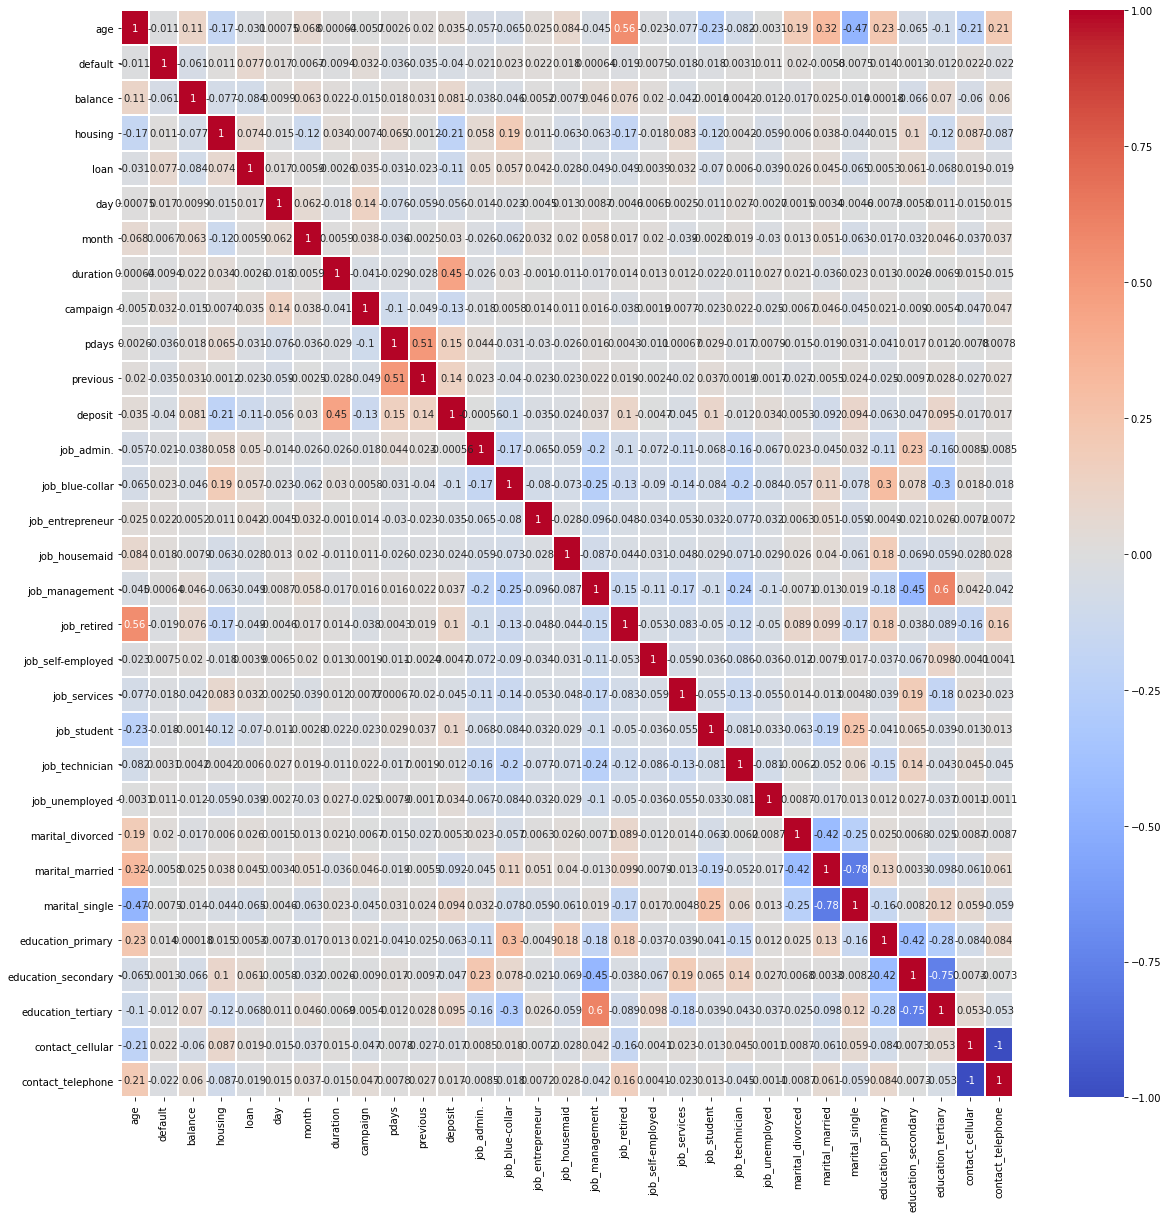

In [416]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=1)

As predicted, deposit is strongly correlated with 'duration'

Job_management is correlated with education_tertiary 

Job_retired is correlated with age 

Marital_single is correlated with age 


#Model : Deep Neural Network

In [420]:
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

In [418]:
x=df.drop('deposit',axis=1)
y=df.deposit

x_train,x_test,y_train,y_test=train_test_split(x,y)


In [419]:
x_train.shape

(8319, 30)

In [424]:
model = Sequential([
                     Dense(128, input_dim=30, activation='relu'),
                     Dropout(0.2),
                     Dense(128, activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(128,activation='relu'),
                     Dense(1,activation='sigmoid')
])
                   
                  

In [425]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               3968      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 53,633
Trainable params: 53,633
Non-trainable params: 0
__________________________________________________

In [426]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [427]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
832/832 [==============================] - 3s 2ms/step - loss: 3.0793 - accuracy: 0.6079
Epoch 2/150
832/832 [==============================] - 2s 2ms/step - loss: 0.9274 - accuracy: 0.6714
Epoch 3/150
832/832 [==============================] - 2s 2ms/step - loss: 0.6445 - accuracy: 0.7020
Epoch 4/150
832/832 [==============================] - 2s 2ms/step - loss: 0.6054 - accuracy: 0.7098
Epoch 5/150
832/832 [==============================] - 2s 2ms/step - loss: 0.5655 - accuracy: 0.7254
Epoch 6/150
832/832 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7319
Epoch 7/150
832/832 [==============================] - 2s 2ms/step - loss: 0.5433 - accuracy: 0.7393
Epoch 8/150
832/832 [==============================] - 2s 2ms/step - loss: 0.5307 - accuracy: 0.7496
Epoch 9/150
832/832 [==============================] - 2s 2ms/step - loss: 0.5287 - accuracy: 0.7462
Epoch 10/150
832/832 [==============================] - 2s 2ms/step - loss: 0.5148 - accura

In [430]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

260/260 [==============================] - 1s 1ms/step - loss: 0.4368 - accuracy: 0.7989
Accuracy: 79.89


In [432]:
y_pred=np.round(model.predict(x_test))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8077893977641544

In [434]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])


Test accuracy: 0.8077893853187561
